### Install & Load Libraries

In [1]:
! pip install --quiet -U featuretools

In [2]:
import featuretools as ft
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

### Load Dataset

In [3]:
df = pd.read_csv('data/lending_club_loan_two.csv')
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df = df[df['issue_d'].dt.year == 2016]

### Manual Variables

#### Date diff beteween issued date & earliest credit line

In [4]:
df['loan_diff_years'] = round((df['issue_d'] - df['earliest_cr_line']).dt.days / 365, 1)

#### ZipCode & State from Addresses

In [5]:
df['address'] = df['address'].apply(lambda x: x[-8:])
df[['state','zip_code']] = df['address'].str.split(expand=True)

#### SubGrade

In [6]:
df['sub_grade'] = df['sub_grade'].apply(lambda x: x[-1:])

#### Drop High Cardinality/Unique Variables

In [7]:
df.drop(columns=['address'], inplace=True)

### Featuretools

In [8]:
es = ft.EntitySet(id = 'bank')

es.entity_from_dataframe(
    entity_id = 'data',
    dataframe = df,
    make_index = True,
    index = 'index'
)

Entityset: bank
  Entities:
    data [Rows: 28088, Columns: 30]
  Relationships:
    No relationships

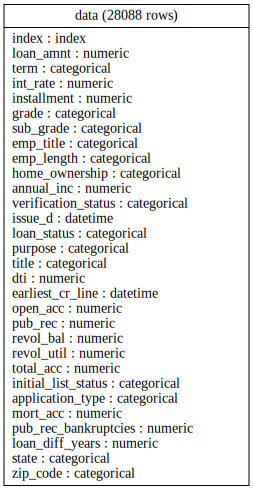

In [9]:
es.plot()

In [10]:
feature_matrix, feature_defs = ft.dfs(
    entityset = es,
    target_entity = 'data',
    trans_primitives = [
        'add_numeric', 
        'multiply_numeric',
        'divide_numeric',
        'percentile'
    ]
)

/opt/conda/lib/python3.7/site-packages/featuretools/synthesis/deep_feature_synthesis.py:152: UserWarning: Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one entity in entityset, changing max_depth to "
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4481: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[k] = com.apply_if_callable(v, data)


In [11]:
feature_matrix.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_diff_years,state,zip_code,annual_inc + dti,annual_inc + installment,annual_inc + int_rate,annual_inc + loan_amnt,annual_inc + loan_diff_years,annual_inc + mort_acc,annual_inc + open_acc,annual_inc + pub_rec,annual_inc + pub_rec_bankruptcies,annual_inc + revol_bal,annual_inc + revol_util,annual_inc + total_acc,dti + installment,dti + int_rate,dti + loan_amnt,dti + loan_diff_years,dti + mort_acc,dti + open_acc,dti + pub_rec,dti + pub_rec_bankruptcies,dti + revol_bal,dti + revol_util,dti + total_acc,installment + int_rate,installment + loan_amnt,installment + loan_diff_years,installment + mort_acc,installment + open_acc,installment + pub_rec,installment + pub_rec_bankruptcies,installment + revol_bal,installment + revol_util,installment + total_acc,int_rate + loan_amnt,int_rate + loan_diff_years,int_rate + mort_acc,int_rate + open_acc,int_rate + pub_rec,int_rate + pub_rec_bankruptcies,int_rate + revol_bal,int_rate + revol_util,int_rate + total_acc,loan_amnt + loan_diff_years,loan_amnt + mort_acc,loan_amnt + open_acc,loan_amnt + pub_rec,loan_amnt + pub_rec_bankruptcies,loan_amnt + revol_bal,loan_amnt + revol_util,loan_amnt + total_acc,loan_diff_years + mort_acc,loan_diff_years + open_acc,loan_diff_years + pub_rec,loan_diff_years + pub_rec_bankruptcies,loan_diff_years + revol_bal,loan_diff_years + revol_util,loan_diff_years + total_acc,mort_acc + open_acc,mort_acc + pub_rec,mort_acc + pub_rec_bankruptcies,mort_acc + revol_bal,mort_acc + revol_util,mort_acc + total_acc,open_acc + pub_rec,open_acc + pub_rec_bankruptcies,open_acc + revol_bal,open_acc + revol_util,open_acc + total_acc,pub_rec + pub_rec_bankruptcies,pub_rec + revol_bal,pub_rec + revol_util,pub_rec + total_acc,pub_rec_bankruptcies + revol_bal,pub_rec_bankruptcies + revol_util,pub_rec_bankruptcies + total_acc,revol_bal + revol_util,revol_bal + total_acc,revol_util + total_acc,annual_inc / dti,annual_inc / installment,annual_inc / int_rate,annual_inc / loan_amnt,annual_inc / loan_diff_years,annual_inc / mort_acc,annual_inc / open_acc,annual_inc / pub_rec,annual_inc / pub_rec_bankruptcies,annual_inc / revol_bal,annual_inc / revol_util,annual_inc / total_acc,dti / annual_inc,dti / installment,dti / int_rate,dti / loan_amnt,dti / loan_diff_years,dti / mort_acc,dti / open_acc,dti / pub_rec,dti / pub_rec_bankruptcies,dti / revol_bal,dti / revol_util,dti / total_acc,installment / annual_inc,installment / dti,installment / int_rate,installment / loan_amnt,installment / loan_diff_years,installment / mort_acc,installment / open_acc,installment / pub_rec,installment / pub_rec_bankruptcies,installment / revol_bal,installment / revol_util,installment / total_acc,int_rate / annual_inc,int_rate / dti,int_rate / installment,int_rate / loan_amnt,int_rate / loan_diff_years,int_rate / mort_acc,int_rate / open_acc,int_rate / pub_rec,int_rate / pub_rec_bankruptcies,int_rate / revol_bal,int_rate / revol_util,int_rate / total_acc,loan_amnt / annual_inc,loan_amnt / dti,loan_amnt / installment,loan_amnt / int_rate,loan_amnt / loan_diff_years,loan_amnt / mort_acc,loan_amnt / open_acc,loan_amnt / pub_rec,loan_amnt / pub_rec_bankruptcies,loan_amnt / revol_bal,loan_amnt / revol_util,loan_amnt / total_acc,loan_diff_years / annual_inc,loan_diff_years / dti,loan_diff_years / installment,loan_diff_years / int_rate,loan_diff_years / loan_amnt,loan_diff_years / mort_acc,loan_diff_years / open_acc,loan_diff_years / pub_rec,loan_diff_years / pub_rec_bankruptcies,loan_diff_years / revol_bal,loan_diff_years / revol_util,loan_diff_years / total_acc,mort_acc / annual_inc,mort_acc / dti,mort_acc / installment,mort_acc / int_rate,mort_acc / loan_amnt,mort_acc / loan_diff_years,mort_acc / open_acc,mort_acc / pub_rec,mort_acc / pub_rec_bankruptcies,mor

In [12]:
feature_defs

[<Feature: loan_amnt>,
 <Feature: term>,
 <Feature: int_rate>,
 <Feature: installment>,
 <Feature: grade>,
 <Feature: sub_grade>,
 <Feature: emp_title>,
 <Feature: emp_length>,
 <Feature: home_ownership>,
 <Feature: annual_inc>,
 <Feature: verification_status>,
 <Feature: loan_status>,
 <Feature: purpose>,
 <Feature: title>,
 <Feature: dti>,
 <Feature: open_acc>,
 <Feature: pub_rec>,
 <Feature: revol_bal>,
 <Feature: revol_util>,
 <Feature: total_acc>,
 <Feature: initial_list_status>,
 <Feature: application_type>,
 <Feature: mort_acc>,
 <Feature: pub_rec_bankruptcies>,
 <Feature: loan_diff_years>,
 <Feature: state>,
 <Feature: zip_code>,
 <Feature: annual_inc + dti>,
 <Feature: annual_inc + installment>,
 <Feature: annual_inc + int_rate>,
 <Feature: annual_inc + loan_amnt>,
 <Feature: annual_inc + loan_diff_years>,
 <Feature: annual_inc + mort_acc>,
 <Feature: annual_inc + open_acc>,
 <Feature: annual_inc + pub_rec>,
 <Feature: annual_inc + pub_rec_bankruptcies>,
 <Feature: annual_inc 

In [13]:
ft.get_valid_primitives(entityset = es, target_entity = 'data')

/opt/conda/lib/python3.7/site-packages/featuretools/synthesis/deep_feature_synthesis.py:152: UserWarning: Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one entity in entityset, changing max_depth to "


([],
 [featuretools.primitives.standard.transform_primitive.Week,
  featuretools.primitives.standard.transform_primitive.IsNull,
  featuretools.primitives.standard.binary_transform.ScalarSubtractNumericFeature,
  featuretools.primitives.standard.transform_primitive.Second,
  featuretools.primitives.standard.binary_transform.AddNumericScalar,
  featuretools.primitives.standard.transform_primitive.Day,
  featuretools.primitives.standard.binary_transform.ModuloNumericScalar,
  featuretools.primitives.standard.binary_transform.LessThanEqualToScalar,
  featuretools.primitives.standard.binary_transform.GreaterThan,
  featuretools.primitives.standard.binary_transform.DivideNumericScalar,
  featuretools.primitives.standard.binary_transform.DivideByFeature,
  featuretools.primitives.standard.binary_transform.LessThan,
  featuretools.primitives.standard.binary_transform.LessThanScalar,
  featuretools.primitives.standard.binary_transform.MultiplyNumericScalar,
  featuretools.primitives.standard.t

In [14]:
feature_matrix.to_csv("output/lending-with-FT.csv")